In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import pylab as pl

In [4]:
p=pd.read_csv('Records.csv', encoding='unicode escape')

In [5]:
pq=p[['UnitsSold','UnitCost','UnitPrice','TotalProfit']]
pq.head(9)

,UnitsSold,UnitCost,UnitPrice,TotalProfit
0,9925,159.42,255.28,951410.50
1,2804,117.11,205.70,248406.36
2,1779,524.96,651.21,224598.75
3,8102,6.92,9.33,19525.82
4,5062,524.96,651.21,639077.50
5,2974,159.42,255.28,285087.64
6,4187,502.54,668.27,693911.51
7,8082,90.93,154.06,510216.66
8,6070,56.67,81.73,152114.20


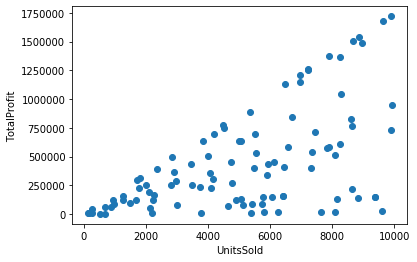

In [7]:
plt.scatter(pq.UnitsSold,pq.TotalProfit)
plt.xlabel("UnitsSold")
plt.ylabel("TotalProfit")
plt.show()

In [9]:
nd=np.random.rand(len(pq))<0.8
train = pq[nd]
test=pq[~nd]

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x=np.asanyarray(train[['UnitsSold']])
train_y=np.asanyarray(train[['TotalProfit']])

test_x=np.asanyarray(test[['UnitsSold']])
test_y=np.asanyarray(test[['TotalProfit']])

poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
train_x_poly

array([[1.0000000e+00, 9.9250000e+03, 9.8505625e+07],
       [1.0000000e+00, 2.8040000e+03, 7.8624160e+06],
       [1.0000000e+00, 1.7790000e+03, 3.1648410e+06],
       [1.0000000e+00, 8.1020000e+03, 6.5642404e+07],
       [1.0000000e+00, 5.0620000e+03, 2.5623844e+07],
       [1.0000000e+00, 4.1870000e+03, 1.7530969e+07],
       [1.0000000e+00, 8.0820000e+03, 6.5318724e+07],
       [1.0000000e+00, 6.0700000e+03, 3.6844900e+07],
       [1.0000000e+00, 6.5930000e+03, 4.3467649e+07],
       [1.0000000e+00, 1.2400000e+02, 1.5376000e+04],
       [1.0000000e+00, 8.2630000e+03, 6.8277169e+07],
       [1.0000000e+00, 8.9740000e+03, 8.0532676e+07],
       [1.0000000e+00, 4.9010000e+03, 2.4019801e+07],
       [1.0000000e+00, 5.4300000e+03, 2.9484900e+07],
       [1.0000000e+00, 5.9080000e+03, 3.4904464e+07],
       [1.0000000e+00, 7.4500000e+03, 5.5502500e+07],
       [1.0000000e+00, 1.2730000e+03, 1.6205290e+06],
       [1.0000000e+00, 5.0700000e+03, 2.5704900e+07],
       [1.0000000e+00, 1.815

In [15]:
reg=linear_model.LinearRegression()
train_y=reg.fit(train_x_poly,train_y)
print("coefficients=",reg.coef_)
print('intercept=',reg.intercept_)

coefficients= [[ 0.00000000e+00 -1.37360987e+01  1.17294115e-02]]
intercept= [127467.68120747]


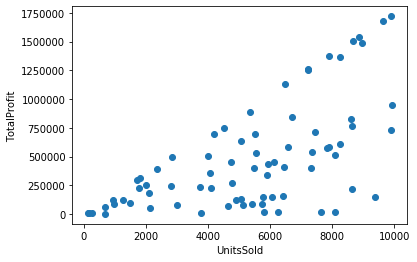

In [16]:
plt.scatter(train.UnitsSold,train.TotalProfit)
plt.xlabel("UnitsSold")
plt.ylabel("TotalProfit")
plt.show()

Text(0, 0.5, 'TotalProfit')

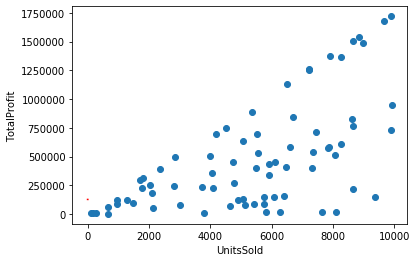

In [27]:
plt.scatter(train.UnitsSold,train.TotalProfit)
#xx=np.arange(0.0,10.0,0.1)
yy=reg.intercept_[0]+reg.coef_[0][1]*xx+reg.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy,'-r')
plt.xlabel("UnitsSold")
plt.ylabel("TotalProfit")

In [28]:
from sklearn.metrics import r2_score

test_x_poly=poly.fit_transform(test_x)
test_y_=reg.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 308929.75
Residual sum of squares (MSE): 182294180833.83
R2-score: -0.97
